# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 8
shuffle_batch = True

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [31]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_rnn_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
dropout_rate = 0.0
bidirectional = False
use_attention = False
reduction_method = torch.sum

learning_rate = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9416755795478822, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007066666832542979, 'overlap rate': 0.42940837815403937}
evaluation performance: {'loss': 1.9401098400354386, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006466666805863497, 'overlap rate': 0.42940087988972664}

Current epoch: 10, 
training performance: {'loss': 1.9324114948511124, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007550000176706817, 'overlap rate': 0.4297800399363041}
evaluation performance: {'loss': 1.98390594124794, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006400000158464537, 'overlap rate': 0.42994004525244234}

Current epoch: 15, 
training performance: {'loss': 1.916600626707077, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007633333545527421, 'overlap rate': 0.4308267131447792}
evaluation performance: {'loss': 1.9279047936201095, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

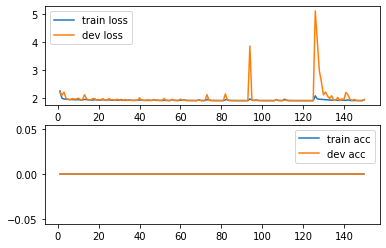

In [9]:
plot_log(log)

## Hyperparameter set 2

In [10]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [11]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9457129955291748, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006583333470189245, 'overlap rate': 0.42945670932531355}
evaluation performance: {'loss': 1.9607862919569015, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000661666679479822, 'overlap rate': 0.42880087718367577}

Current epoch: 10, 
training performance: {'loss': 1.9282902002334594, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006633333468926139, 'overlap rate': 0.43005337491631507}
evaluation performance: {'loss': 1.9226447522640229, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006325000147626269, 'overlap rate': 0.43013337850570676}

Current epoch: 15, 
training performance: {'loss': 1.9221668034791946, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006650000133959111, 'overlap rate': 0.4305250450968742}
evaluation performance: {'loss': 1.9146603509783744, 'abosulate accuracy': 0.0, 'consecutive overlap rate':

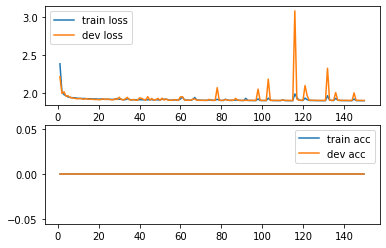

In [12]:
plot_log(log)

## Hyperparameter set 3

In [13]:
hidden_size = 1024
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [14]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.961787113547325, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007700000132899731, 'overlap rate': 0.42088837921619415}
evaluation performance: {'loss': 3.236041435599327, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006350000146994716, 'overlap rate': 0.22618252597749233}

Current epoch: 10, 
training performance: {'loss': 1.9598469078540801, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006383333500707522, 'overlap rate': 0.4221233732998371}
evaluation performance: {'loss': 4.519753497838974, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006916666818142403, 'overlap rate': 0.36723170466721056}

Current epoch: 15, 
training performance: {'loss': 1.955908367037773, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0005850000135978917, 'overlap rate': 0.4235200397670269}
evaluation performance: {'loss': 4.663316428661346, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00

## Hyperparameter set 4

In [15]:
hidden_size = 1024
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [16]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.98693408370018, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006833333485701587, 'overlap rate': 0.4148233748972416}
evaluation performance: {'loss': 3.4721343994140623, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006541666818520753, 'overlap rate': 0.02284750258550048}

Current epoch: 10, 
training performance: {'loss': 1.9848731458187103, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006666666849923786, 'overlap rate': 0.41510837748646734}
evaluation performance: {'loss': 3.4268345922231673, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006566666830622126, 'overlap rate': 0.022831669077277184}

Current epoch: 15, 
training performance: {'loss': 1.988123595714569, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006316666760540102, 'overlap rate': 0.41500504314899445}
evaluation performance: {'loss': 3.3990085422992706, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 

## Hyperparameter set 5

In [33]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9652977168560029, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006733333539159503, 'overlap rate': 0.4195117063820362}
evaluation performance: {'loss': 4.804629111289978, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006250000104046193, 'overlap rate': 0.40945920534431934}

Current epoch: 10, 
training performance: {'loss': 1.9562960535287857, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000646666679676855, 'overlap rate': 0.4231067068874836}
evaluation performance: {'loss': 3.4449686139822004, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000689166680604103, 'overlap rate': 0.23545419313013555}

Current epoch: 15, 
training performance: {'loss': 1.9597485482692718, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007350000181759242, 'overlap rate': 0.4229700453579426}
evaluation performance: {'loss': 4.687711226940155, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00

# RedStr



In [17]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [18]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [19]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9340797066688538, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007166666837292723, 'overlap rate': 0.4300533771514893}
evaluation performance: {'loss': 1.9249334171414376, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007300000186660327, 'overlap rate': 0.43032670989632604}

Current epoch: 10, 
training performance: {'loss': 1.9510989725589751, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007300000157556497, 'overlap rate': 0.42784337177872656}
evaluation performance: {'loss': 2.6828266620635985, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007244350399560062, 'overlap rate': 0.4243915807455778}

Current epoch: 15, 
training performance: {'loss': 1.9061446636915207, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007933333465189208, 'overlap rate': 0.4322333797812462}
evaluation performance: {'loss': 1.9047177344560624, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 

## Hyperparameter set 2

In [20]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9554513812065124, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006183333447552286, 'overlap rate': 0.4283550441265106}
evaluation performance: {'loss': 2.0825592026114466, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006567937992258521, 'overlap rate': 0.42761743292212484}

Current epoch: 10, 
training performance: {'loss': 1.9312514305114745, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006866666808491573, 'overlap rate': 0.42954671159386637}
evaluation performance: {'loss': 1.9262288004159926, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006733333488227799, 'overlap rate': 0.4296983785927296}

Current epoch: 15, 
training performance: {'loss': 1.9252705812454223, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007316666800761595, 'overlap rate': 0.43077504336833955}
evaluation performance: {'loss': 1.991005653142929, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 

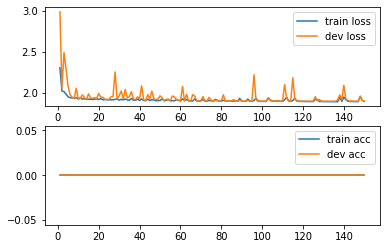

In [22]:
plot_log(log)

## Hyperparameter set 3

In [23]:
hidden_size = 1024
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.967242059111595, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000761666681501083, 'overlap rate': 0.42022004052996637}
evaluation performance: {'loss': 2.9633139044046404, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.001095833347790176, 'overlap rate': 0.13774584904313086}

Current epoch: 10, 
training performance: {'loss': 1.9538359612226486, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0023166666826000435, 'overlap rate': 0.4209383733570576}
evaluation performance: {'loss': 4.374764069914818, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.002500000028521754, 'overlap rate': 0.37340753637254237}

Current epoch: 15, 
training performance: {'loss': 1.9686041921377182, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0008450000153970904, 'overlap rate': 0.4179750420153141}
evaluation performance: {'loss': 3.6556256294250487, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00

## Hyperparameter set 4

In [25]:
hidden_size = 1024
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [26]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.986579555273056, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000723333346832078, 'overlap rate': 0.41503671035170553}
evaluation performance: {'loss': 3.432835093140602, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006666666817181976, 'overlap rate': 0.022872502682730556}

Current epoch: 10, 
training performance: {'loss': 1.9850503891706466, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006600000160688069, 'overlap rate': 0.4148083731532097}
evaluation performance: {'loss': 3.3855454176664352, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006816666824306594, 'overlap rate': 0.02277833567932248}

Current epoch: 15, 
training performance: {'loss': 1.9819865465164184, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006750000175088644, 'overlap rate': 0.4151950404047966}
evaluation performance: {'loss': 4.402246421575546, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

KeyboardInterrupt: ignored

## Hyperparameter set 5

In [29]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [30]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9776313066482545, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0007716666848864406, 'overlap rate': 0.4153017088770866}
evaluation performance: {'loss': 3.411984035372734, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006700000183627707, 'overlap rate': 0.022623335686512293}

Current epoch: 10, 
training performance: {'loss': 1.9734804689884187, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006833333492977545, 'overlap rate': 0.4158383794128895}
evaluation performance: {'loss': 5.0486513555049894, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000671666681591887, 'overlap rate': 0.40175504274666307}

Current epoch: 15, 
training performance: {'loss': 1.973136830329895, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006483333418145776, 'overlap rate': 0.4166850447654724}
evaluation performance: {'loss': 3.2174566060304643, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.

KeyboardInterrupt: ignored

## Hyperparameter set 6

In [27]:
hidden_size = 1024
embd_dim = 1024
num_layers = 1
rnn_type = "RNN"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [28]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9832786321640015, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006516666828247253, 'overlap rate': 0.41485837623476984}
evaluation performance: {'loss': 3.4209567487239836, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.000677500014717225, 'overlap rate': 0.02285500238649547}

Current epoch: 10, 
training performance: {'loss': 1.986122763156891, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006516666799143422, 'overlap rate': 0.41509503722190855}
evaluation performance: {'loss': 3.402480846643448, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006208333494214458, 'overlap rate': 0.02272416902706027}

Current epoch: 15, 
training performance: {'loss': 1.985691824555397, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0006666666813543998, 'overlap rate': 0.41478004306554794}
evaluation performance: {'loss': 3.3783168494701385, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0

KeyboardInterrupt: ignored